In [1]:
# data analysis libraries
import pandas as pd
import numpy as np
import random as rnd

# data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# cModel design
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

# evaluation metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
#we are loading our dataset here for the covid cases reported at different coutries
dataset = pd.read_csv("C:/Users/Uzzi-Azree/Downloads/Covid Live(1).csv")
dataset.head()

# Country,\nOther Total\nCases Total\nDeaths  New\nDeaths Total\nRecovered  \
0  1             USA   98,166,904     1,084,282          NaN       94,962,112   
1  2           India   44,587,307       528,629          NaN       44,019,095   
2  3          France   35,342,950       155,078          NaN       34,527,115   
3  4          Brazil   34,706,757       686,027          NaN       33,838,636   
4  5         Germany   33,312,373       149,948          NaN       32,315,200   

  Active\nCases Serious,\nCritical Tot Cases/\n1M pop Deaths/\n1M pop  \
0     2,120,510              2,970            293,206           3,239   
1        39,583                698             31,698             376   
2       660,757                869            538,892           2,365   
3       182,094              8,318            161,162           3,186   
4       847,225              1,406            397,126           1,788   

    Total\nTests Tests/\n1M pop     Population  
0  1,118,158,870      3,339,729    334,805,269  
1    894,416,853        635,857  1,406,631,776  
2    271,490,188      4,139,547     65,584,518  
3     63,776,166        296,146    215,353,593  
4    122,332,384      1,458,359     83,883,596

In [3]:
#we are gonna delete two columns which we are not going to use and may hinder outcome
del dataset['#']
del dataset['Country,\nOther']

In [4]:
#analysing the features in the dataset
print(dataset.columns.values)

['Total\nCases' 'Total\nDeaths' 'New\nDeaths' 'Total\nRecovered'
 'Active\nCases' 'Serious,\nCritical' 'Tot Cases/\n1M pop'
 'Deaths/\n1M pop' 'Total\nTests' 'Tests/\n1M pop' 'Population']


In [5]:
#checking for null values
dataset.isnull().sum() #counting all the values ine ach column to check for any missing values

Total\nCases            0
Total\nDeaths           5
New\nDeaths           227
Total\nRecovered       16
Active\nCases          15
Serious,\nCritical     83
Tot Cases/\n1M pop      2
Deaths/\n1M pop         7
Total\nTests           16
Tests/\n1M pop         16
Population              2
dtype: int64

In [6]:
# Replacing NaN with Zero value "0" with missing values
dataset['New\nDeaths'].replace(np.NaN,'0',inplace=True)
dataset['Serious,\nCritical'].replace(np.NaN,'0',inplace=True)
dataset['Total\nTests'].replace(np.NaN,'0',inplace=True)
dataset['Tests/\n1M pop'].replace(np.NaN,'0',inplace=True)

In [7]:
#checking the datatype of all the columns(features)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Total
Cases        230 non-null    object
 1   Total
Deaths       225 non-null    object
 2   New
Deaths         230 non-null    object
 3   Total
Recovered    214 non-null    object
 4   Active
Cases       215 non-null    object
 5   Serious,
Critical  230 non-null    object
 6   Tot Cases/
1M pop  228 non-null    object
 7   Deaths/
1M pop     223 non-null    object
 8   Total
Tests        230 non-null    object
 9   Tests/
1M pop      230 non-null    object
 10  Population         228 non-null    object
dtypes: object(11)
memory usage: 19.9+ KB


In [8]:
dataset.head()

Total\nCases Total\nDeaths New\nDeaths Total\nRecovered Active\nCases  \
0   98,166,904     1,084,282           0       94,962,112     2,120,510   
1   44,587,307       528,629           0       44,019,095        39,583   
2   35,342,950       155,078           0       34,527,115       660,757   
3   34,706,757       686,027           0       33,838,636       182,094   
4   33,312,373       149,948           0       32,315,200       847,225   

  Serious,\nCritical Tot Cases/\n1M pop Deaths/\n1M pop   Total\nTests  \
0              2,970            293,206           3,239  1,118,158,870   
1                698             31,698             376    894,416,853   
2                869            538,892           2,365    271,490,188   
3              8,318            161,162           3,186     63,776,166   
4              1,406            397,126           1,788    122,332,384   

  Tests/\n1M pop     Population  
0      3,339,729    334,805,269  
1        635,857  1,406,631,776  
2      4,139,547     65,584,518  
3        296,146    215,353,593  
4      1,458,359     83,883,596

In [9]:
#we are removing the commas so that we can remain with a constant value that can be changed to a float value from a string value
dataset['Total\nCases']=dataset['Total\nCases'].str.replace(',','')
dataset['Total\nDeaths']=dataset['Total\nDeaths'].str.replace(',','')
dataset['New\nDeaths']=dataset['New\nDeaths'].str.replace(',','')
dataset['Total\nRecovered']=dataset['Total\nRecovered'].str.replace(',','')
dataset['Active\nCases']=dataset['Active\nCases'].str.replace(',','')
dataset['Serious,\nCritical']=dataset['Serious,\nCritical'].str.replace(',','')
dataset['Tot Cases/\n1M pop']=dataset['Tot Cases/\n1M pop'].str.replace(',','')
dataset['Deaths/\n1M pop']=dataset['Deaths/\n1M pop'].str.replace(',','')
dataset['Total\nTests']=dataset['Total\nTests'].str.replace(',','')
dataset['Tests/\n1M pop']=dataset['Tests/\n1M pop'].str.replace(',','')
dataset['Population']=dataset['Population'].str.replace(',','')

In [10]:
#checking the outcome after stripping the commas
dataset.head()

Total\nCases Total\nDeaths New\nDeaths Total\nRecovered Active\nCases  \
0     98166904       1084282           0         94962112       2120510   
1     44587307        528629           0         44019095         39583   
2     35342950        155078           0         34527115        660757   
3     34706757        686027           0         33838636        182094   
4     33312373        149948           0         32315200        847225   

  Serious,\nCritical Tot Cases/\n1M pop Deaths/\n1M pop Total\nTests  \
0               2970             293206            3239   1118158870   
1                698              31698             376    894416853   
2                869             538892            2365    271490188   
3               8318             161162            3186     63776166   
4               1406             397126            1788    122332384   

  Tests/\n1M pop  Population  
0        3339729   334805269  
1         635857  1406631776  
2        4139547    65584518  
3         296146   215353593  
4        1458359    83883596

In [11]:
#We can now view the new columns
print(dataset.columns.values)

['Total\nCases' 'Total\nDeaths' 'New\nDeaths' 'Total\nRecovered'
 'Active\nCases' 'Serious,\nCritical' 'Tot Cases/\n1M pop'
 'Deaths/\n1M pop' 'Total\nTests' 'Tests/\n1M pop' 'Population']


In [12]:
#now we are removing each and every null value that could be missing in our dataset by for looping
for i in dataset.columns:
    if dataset[i].dtype == 'object':
        modevalue = dataset[i].mode()[0]
        dataset[i].fillna(modevalue, inplace = True)
    elif dataset[i].dtype == 'int32' or 'int64' or 'float64':
        dataset[i].fillna(dataset[i].median(), inplace = True)

In [13]:
#changing our values from string default to integer values
dataset['Total\nCases'] = dataset['Total\nCases'].astype(int)
#dataset['Total\nCases'] = pd.to_numeric(dataset['Total\nCases'])
dataset['Total\nDeaths'] = dataset['Total\nDeaths'].astype(int)
dataset['New\nDeaths'] = dataset['New\nDeaths'].astype(int)
dataset['Total\nRecovered'] = dataset['Total\nRecovered'].astype(int)
dataset['Active\nCases'] = dataset['Active\nCases'].astype(int)
dataset['Serious,\nCritical'] = dataset['Serious,\nCritical'].astype(int)
dataset['Tot Cases/\n1M pop'] = dataset['Tot Cases/\n1M pop'].astype(int)
dataset['Deaths/\n1M pop'] = dataset['Deaths/\n1M pop'].astype(int)
dataset['Total\nTests'] = dataset['Total\nTests'].astype(int)
dataset['Tests/\n1M pop'] = dataset['Tests/\n1M pop'].astype(int)
dataset['Population'] = dataset['Population'].astype(int)

In [14]:
#specifying the independent and dependent variables
X = dataset.drop('Population',axis=1)#the faeture set includes all the columns except the price, so we drop it
y = dataset['Population'] #depenedent variabele as the aim of the model is to predict the price

In [15]:
#splitting the dataset into train and validation
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35,random_state=101) #test size is 35% of the total dataset

In [16]:
#Data normalization/scaling
scaler = MinMaxScaler()
# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.0
Min:  0.0


In [17]:
model = Sequential()#from keras and tnsorflow libraries
# input layer
model.add(Dense(19,activation='relu'))

# hidden layers
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

# output layer
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [18]:
#lets visaulaize the model
print(model)

In [19]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)#the epochs are the number of traing iterations

Epoch 1/400
2/2 [==============================] - 3s 597ms/step - loss: 30143974563905536.0000 - val_loss: 2057171894272000.0000
Epoch 2/400
2/2 [==============================] - 0s 70ms/step - loss: 30143974563905536.0000 - val_loss: 2057171894272000.0000
Epoch 3/400
2/2 [==============================] - 0s 71ms/step - loss: 30143974563905536.0000 - val_loss: 2057171894272000.0000
Epoch 4/400
2/2 [==============================] - 0s 59ms/step - loss: 30143976711389184.0000 - val_loss: 2057171894272000.0000
Epoch 5/400
2/2 [==============================] - 0s 64ms/step - loss: 30143974563905536.0000 - val_loss: 2057171894272000.0000
Epoch 6/400
2/2 [==============================] - 0s 74ms/step - loss: 30143974563905536.0000 - val_loss: 2057171894272000.0000
Epoch 7/400
2/2 [==============================] - 0s 63ms/step - loss: 30143976711389184.0000 - val_loss: 2057171894272000.0000
Epoch 8/400
2/2 [==============================] - 0s 64ms/step - loss: 30143976711389184.0000 -

2/2 [==============================] - 0s 32ms/step - loss: 30143976711389184.0000 - val_loss: 2057171223183360.0000
Epoch 65/400
2/2 [==============================] - 0s 24ms/step - loss: 30143976711389184.0000 - val_loss: 2057171223183360.0000
Epoch 66/400
2/2 [==============================] - 0s 24ms/step - loss: 30143976711389184.0000 - val_loss: 2057170820530176.0000
Epoch 67/400
2/2 [==============================] - 0s 24ms/step - loss: 30143974563905536.0000 - val_loss: 2057170820530176.0000
Epoch 68/400
2/2 [==============================] - 0s 50ms/step - loss: 30143974563905536.0000 - val_loss: 2057170820530176.0000
Epoch 69/400
2/2 [==============================] - 0s 24ms/step - loss: 30143974563905536.0000 - val_loss: 2057170820530176.0000
Epoch 70/400
2/2 [==============================] - 0s 72ms/step - loss: 30143974563905536.0000 - val_loss: 2057170820530176.0000
Epoch 71/400
2/2 [==============================] - 0s 67ms/step - loss: 30143974563905536.0000 - val_l

Epoch 127/400
2/2 [==============================] - 0s 80ms/step - loss: 30143901549461504.0000 - val_loss: 2057141561065472.0000
Epoch 128/400
2/2 [==============================] - 0s 69ms/step - loss: 30143901549461504.0000 - val_loss: 2057140218888192.0000
Epoch 129/400
2/2 [==============================] - 0s 73ms/step - loss: 30143892959526912.0000 - val_loss: 2057138474057728.0000
Epoch 130/400
2/2 [==============================] - 0s 62ms/step - loss: 30143892959526912.0000 - val_loss: 2057136863444992.0000
Epoch 131/400
2/2 [==============================] - 0s 62ms/step - loss: 30143888664559616.0000 - val_loss: 2057135387049984.0000
Epoch 132/400
2/2 [==============================] - 0s 65ms/step - loss: 30143882222108672.0000 - val_loss: 2057133508001792.0000
Epoch 133/400
2/2 [==============================] - 0s 68ms/step - loss: 30143877927141376.0000 - val_loss: 2057132165824512.0000
Epoch 134/400
2/2 [==============================] - 0s 65ms/step - loss: 301438757

2/2 [==============================] - 0s 58ms/step - loss: 30143210059726848.0000 - val_loss: 2056863193497600.0000
Epoch 190/400
2/2 [==============================] - 0s 60ms/step - loss: 30143184289923072.0000 - val_loss: 2056853932474368.0000
Epoch 191/400
2/2 [==============================] - 0s 50ms/step - loss: 30143162815086592.0000 - val_loss: 2056844134580224.0000
Epoch 192/400
2/2 [==============================] - 0s 54ms/step - loss: 30143141340250112.0000 - val_loss: 2056834202468352.0000
Epoch 193/400
2/2 [==============================] - 0s 49ms/step - loss: 30143117717929984.0000 - val_loss: 2056824404574208.0000
Epoch 194/400
2/2 [==============================] - 0s 76ms/step - loss: 30143085505675264.0000 - val_loss: 2056814472462336.0000
Epoch 195/400
2/2 [==============================] - 0s 65ms/step - loss: 30143061883355136.0000 - val_loss: 2056803600826368.0000
Epoch 196/400
2/2 [==============================] - 0s 83ms/step - loss: 30143036113551360.0000 

2/2 [==============================] - 0s 70ms/step - loss: 30139941589614592.0000 - val_loss: 2055578327187456.0000
Epoch 252/400
2/2 [==============================] - 0s 74ms/step - loss: 30139862132719616.0000 - val_loss: 2055544235884544.0000
Epoch 253/400
2/2 [==============================] - 0s 65ms/step - loss: 30139778380857344.0000 - val_loss: 2055511352541184.0000
Epoch 254/400
2/2 [==============================] - 0s 65ms/step - loss: 30139688186544128.0000 - val_loss: 2055479542939648.0000
Epoch 255/400
2/2 [==============================] - 0s 70ms/step - loss: 30139606582165504.0000 - val_loss: 2055447867555840.0000
Epoch 256/400
2/2 [==============================] - 0s 65ms/step - loss: 30139527125270528.0000 - val_loss: 2055416057954304.0000
Epoch 257/400
2/2 [==============================] - 0s 69ms/step - loss: 30139441225924608.0000 - val_loss: 2055385187876864.0000
Epoch 258/400
2/2 [==============================] - 0s 67ms/step - loss: 30139363916513280.0000 

2/2 [==============================] - 0s 65ms/step - loss: 30131340917604352.0000 - val_loss: 2052229997527040.0000
Epoch 314/400
2/2 [==============================] - 0s 79ms/step - loss: 30131162676461568.0000 - val_loss: 2052148527366144.0000
Epoch 315/400
2/2 [==============================] - 0s 58ms/step - loss: 30130917863325696.0000 - val_loss: 2052064507068416.0000
Epoch 316/400
2/2 [==============================] - 0s 64ms/step - loss: 30130735327215616.0000 - val_loss: 2051977131327488.0000
Epoch 317/400
2/2 [==============================] - 0s 67ms/step - loss: 30130503398981632.0000 - val_loss: 2051894184771584.0000
Epoch 318/400
2/2 [==============================] - 0s 69ms/step - loss: 30130286503133184.0000 - val_loss: 2051812714610688.0000
Epoch 319/400
2/2 [==============================] - 0s 64ms/step - loss: 30130067459801088.0000 - val_loss: 2051732586627072.0000
Epoch 320/400
2/2 [==============================] - 0s 78ms/step - loss: 30129835531567104.0000 

2/2 [==============================] - 0s 66ms/step - loss: 30112898328035328.0000 - val_loss: 2045063844593664.0000
Epoch 376/400
2/2 [==============================] - 0s 85ms/step - loss: 30112479568723968.0000 - val_loss: 2044912581214208.0000
Epoch 377/400
2/2 [==============================] - 0s 71ms/step - loss: 30112086579216384.0000 - val_loss: 2044762660012032.0000
Epoch 378/400
2/2 [==============================] - 0s 69ms/step - loss: 30111695737192448.0000 - val_loss: 2044613812551680.0000
Epoch 379/400
2/2 [==============================] - 0s 73ms/step - loss: 30111309190135808.0000 - val_loss: 2044465904615424.0000
Epoch 380/400
2/2 [==============================] - 0s 57ms/step - loss: 30110924790562816.0000 - val_loss: 2044319741509632.0000
Epoch 381/400
2/2 [==============================] - 0s 65ms/step - loss: 30110544685957120.0000 - val_loss: 2044176262758400.0000
Epoch 382/400
2/2 [==============================] - 0s 61ms/step - loss: 30110166728835072.0000 

Training loss per epoch
-This plot shows the training loss per epoch.
-This plot helps us to see if there is overfitting in the model. In this case there is no overfitting because both lines go down at the same time.

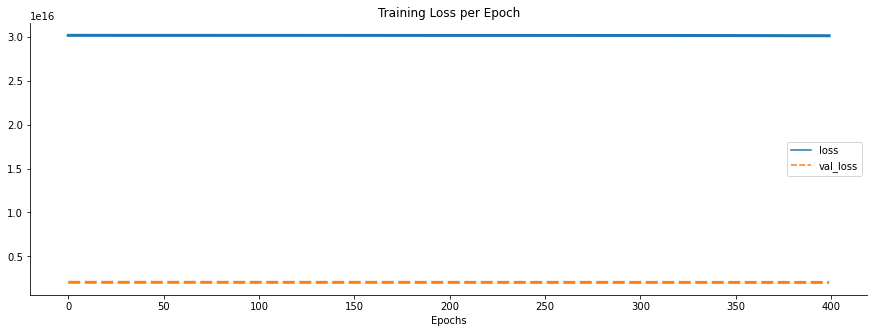

In [20]:
losses = pd.DataFrame(model.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [21]:
# predictions on the test set
predictions = model.predict(X_test)
print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('Variance Regression Score: ',explained_variance_score(y_test,predictions))
print('\n\nDescriptive Statistics:\n',dataset['Population'].describe())

3/3 [==============================] - 0s 8ms/step
MAE:  20829841.702932097
MSE:  2040753298355332.8
RMSE:  45174697.54580912
Variance Regression Score:  -7.480181952512766e-05


Descriptive Statistics:
 count    2.300000e+02
mean     3.463086e+07
std      1.383345e+08
min      7.990000e+02
25%      5.476582e+05
50%      5.889248e+06
75%      2.197109e+07
max      1.448471e+09
Name: Population, dtype: float64


C:\Users\Uzzi-Azree\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

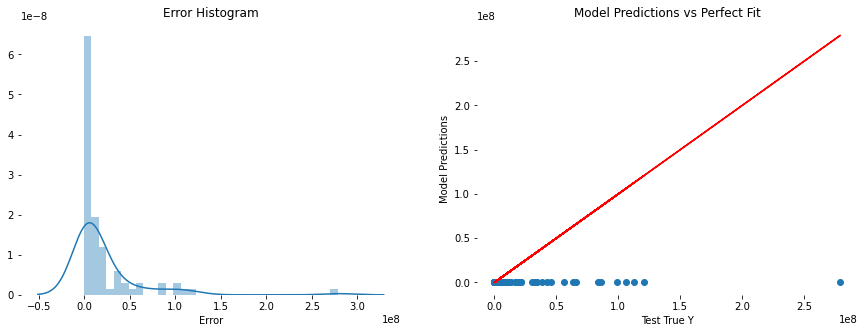

In [23]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
# Our model predictions
plt.scatter(y_test,predictions)
# Perfect predictions
plt.plot(y_test,y_test,'r')
errors = y_test.values.reshape(81, 1) - predictions
sns.distplot(errors, ax=axes[0])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

In [24]:
## fueatures of new country
single_country = dataset.drop('Population',axis=1).iloc[0]
print(f'Features of new house :\n{single_country}')
# reshape the numpy array and scale the features
single_country = scaler.transform(single_country.values.reshape(-1, 10))
# run the model and get the price prediction
print('\nPredicted Population:',model.predict(single_country)[0,0])
# original price
print('\nOriginal Population:',dataset.iloc[0]['Population'])

Features of new house :
Total\nCases            98166904
Total\nDeaths            1084282
New\nDeaths                    0
Total\nRecovered        94962112
Active\nCases            2120510
Serious,\nCritical          2970
Tot Cases/\n1M pop        293206
Deaths/\n1M pop             3239
Total\nTests          1118158870
Tests/\n1M pop           3339729
Name: 0, dtype: int32
1/1 [==============================] - 0s 68ms/step

Predicted Population: 1514079.8

Original Population: 334805269


C:\Users\Uzzi-Azree\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
